we have data on patients seen by cardiologist.  the mailgoal of this notebook isnto build 
a machine learning model, that will be able to predict the  riskof a heart attack on  patient's
health condition.

Here we have the description of thefeatures:

age-age in years

sex-sex(0=female; 1=male)

cp-chest pain type(1 = typical angina; 3 = non-anginal pain; 0=asmptomatic)

trbps-resting blood pressure (in mm Hg on addmission to the hospital)

chol-serum cholestoral in mg/dl

fbs-fasting blood sugar>120 mg/dl(0=false;1=true)

restecg-resting electrocardiographic results (0=normal; 1 =hypertrophy; 2 =having ST-T wave abnormality)

thalachh-maximum heart rate achieved

exng-exercize induced angina(0=no; 1=yes)

oldpeak-ST depression induced by exercize related to rest

slp-the slope of the peak exercise ST segment (0=downsloping; 1=flat;2=upsloping)

caa-number of majorvessels(0-4) colored by floursopy

thall-thallium stress test(1=fixed defect;2=reversable defect;3=normal)

output-0=less chance of heart attack; 1= more  chance of heart attack

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the dataset
df=pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df.shape

(303, 14)

In [10]:
type(df)

pandas.core.frame.DataFrame

1. The dataset includes information about 303 points
2. There are 13 features.Even though all of them are numeric type, only 5 are really numerical,  the
    rest are categorical.
    
    categorical features : sex, cp, fbs, restecg, excng, slg, caa, thall
        
    numerical features : age, trtbps, chol,thalachh, oldpeak
        
3. The target is output. 0 is low risk patien, 1 is hih risk patient
4. There are no misiing values.

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Cleaning

# Check for duplicate value

In [12]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

There is one duplicate we observed and delete it

In [14]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

In [15]:
df.iloc[164:165]    #[Row(start:end-1),col(start:end)] end-1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


# Check the null

In [16]:
df.isnull().sum()
#df.isna().sum()
#df.dropna()
#df.fillna()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Checking outliers

<Axes: >

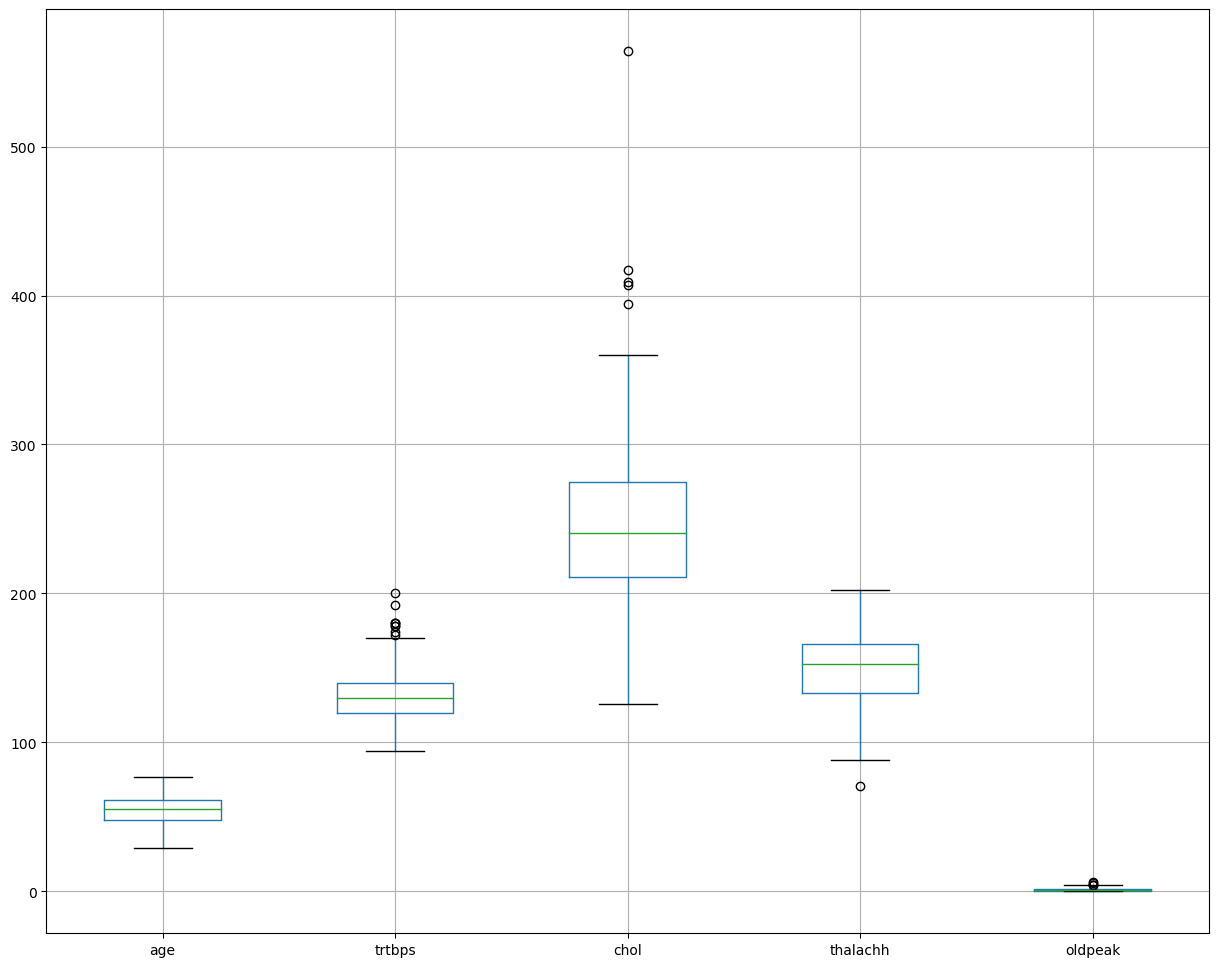

In [17]:
# checking for the presence of outliers in num cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])

No outliers are present in age attribute but there are outliers in trtps, chol,  thalachh, oldpeak
attributes. So we need to get the exact values of outliers using IQR method

In [18]:
# Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order
# 2. calculate the 1st and 3rd quartiles(Q1 and Q3)
# 3. compute IQR(Q3-Q1)
# 4. Compute lower bound =(Q1-1.5*IQR), upper bound(Q3+1.5*IQR)
# 5. loop through the values of dataset and chheck for those  who fall below the lower bound
#    and above the upper bound and mark them as outliers


In [19]:
#findings the values of outeliers
 
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("the val of Q1 and Q2")
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower and upper bound",lwr_bound,upr_bound)
    
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list  #driver code


for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("outliers in",i,"attribute :",outliers)

outliers in age attribute : []
outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
outliers in chol attribute : [394, 407, 409, 417, 564]
outliers in thalachh attribute : [71]
outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [20]:
# Handling outliers using Quantile based flooring and capping method
# the outlier is capped at a certain valueabobe the 90th percentile value or floored at a factor
# computing 10th,90th percentiles and replacing the outliers

def handle_outliers(data):
    
    tenth_percentile = np.percentile(data,10)
    ninetieth_percentile = np.percentile(data,90)
    
    b = np.where(data<tenth_percentile, tenth_percentile, data)
    
    b1 = np.where(data>ninetieth_percentile, ninetieth_percentile, b)
    return b1

for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])

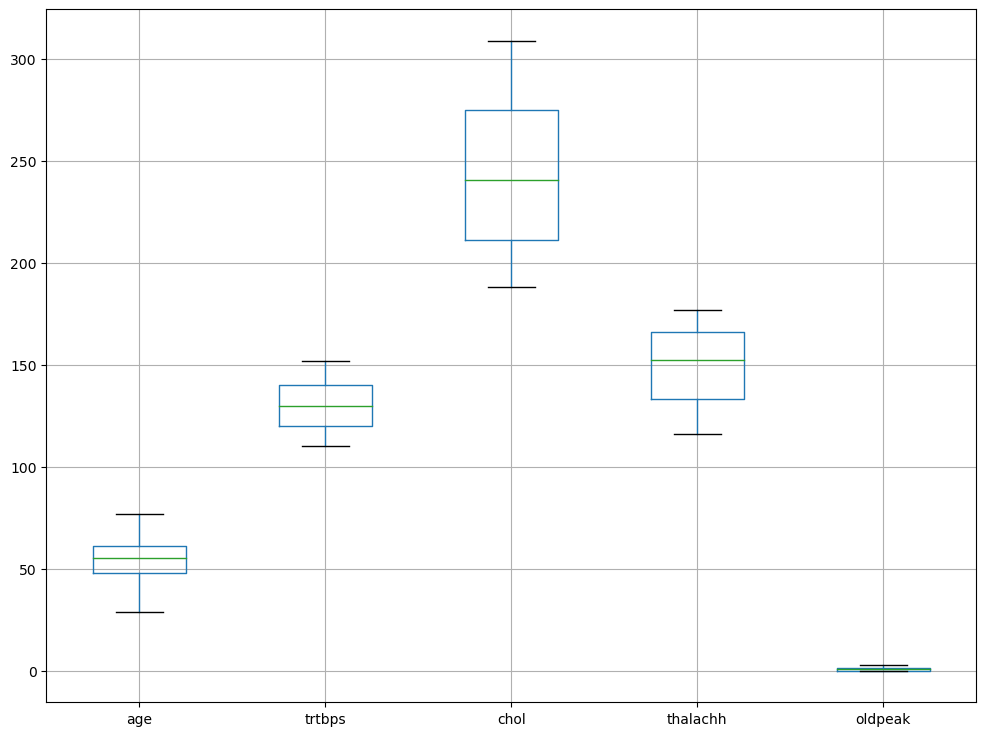

In [21]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']);

# visulization

In this section,we will get an idea about our patients by considering all the feautres seperately.

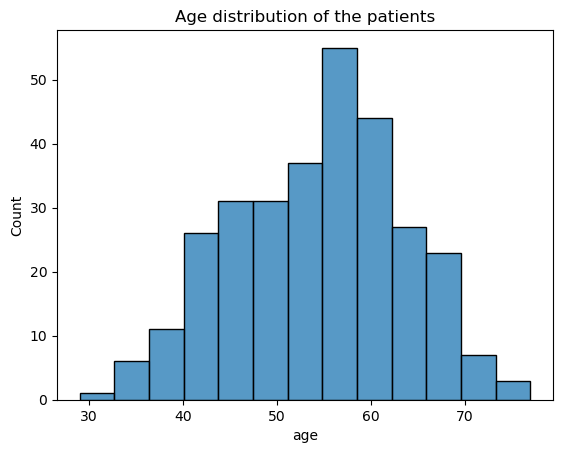

In [22]:
#Age
sns.histplot(df.age)
plt.title('Age distribution of the patients')
plt.show()

The dataset contain information about older pateints, which is to be expected. the majority of the
patients are older than 40. The peak is at 57-58years old.

In [23]:
#Gender
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

0=Female

1=Male
 
We have almost 2 times more males than females

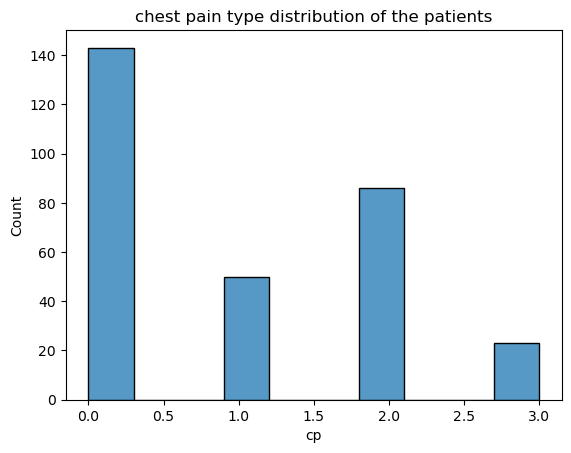

In [24]:
#chest pain type
sns.histplot(df.cp)
plt.title('chest pain type distribution of the patients')
plt.savefig('c11png')
plt.show()


1 = typical angina;2= atypical angina;3= non-typical pain;0= asymptomatic

Almost a half of thee patient have no pain in chest

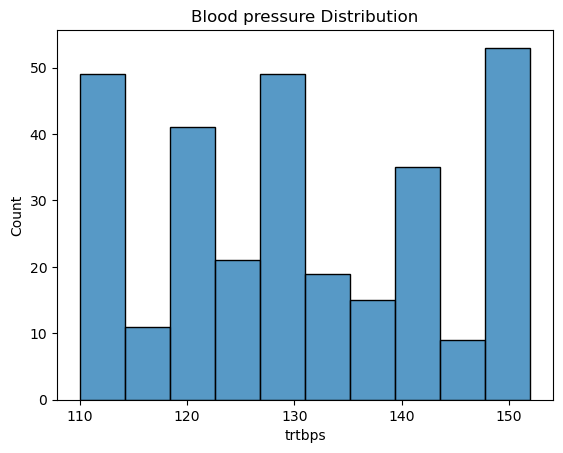

In [25]:
#Resting blood pressuure
sns.histplot(df.trtbps)
plt.title('Blood pressure Distribution')
plt.show()

According to the Europeon society of cardiology,the following classification for blood pressure is
applied:
    
            Category                    Blood pressure
           
            Optimal                         < 120
           
            Normal                       120-129
        
            High Normal                    130-139
            
            Grade 1 hypertension               140-159
            
            Grade 2 hypertension             160-179
            
            Grade 3 hypertension           >_180
            
     In our dataset , the resting blood pressure distribution has a peak at a value of approx.150

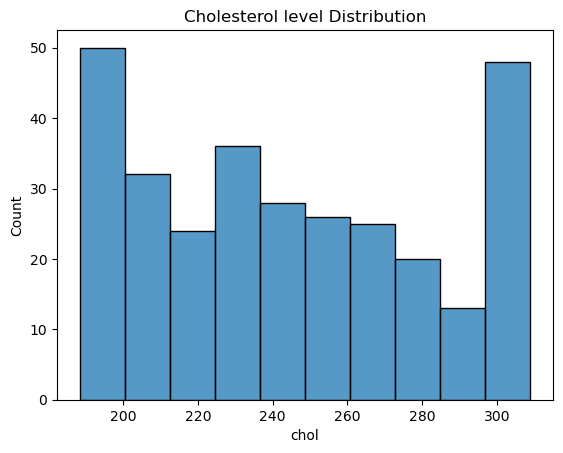

In [26]:
#cholestrol
sns.histplot(df.chol)
plt.title('Cholesterol level Distribution')
plt.show()

The following interpretation of cholesterol level is usually used (this information was taken from wikipedia):
    
cholesterol,mg/dl   Interpretation
<200                Desirable
200-239             Borderline
>240                High

In our dataset some patients have an extremely  high level of cholesterol.

In [27]:
# fasting blood sugar
df.fbs.value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

Reminnder:0 means less or equal to 120mg/dl(which is good),1 means higher than 120 mg/dl.

The majority of the patients don't have serious blood sugar

0=normal; 1=hypertropy, 2=havingST-T wave abnormality

About 50% of the partients have hypertropy. Only a few of the patients have ST-T wave abnormality.The rest of them havee normal 
results.

In our  dataset ,highest value for thalachh is approx. 170-180


In [28]:
#The chance of Heart attack
df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

0=less chance of heart attack,1=more cchance of heart attack

54.3% of patients have a high risk of heart attack, 45.7% of patients have low risk of heart attack

The conclusion is that people with good health condition has a lower chance of heart attack.


Text(0.5, 1.0, 'correlation map')

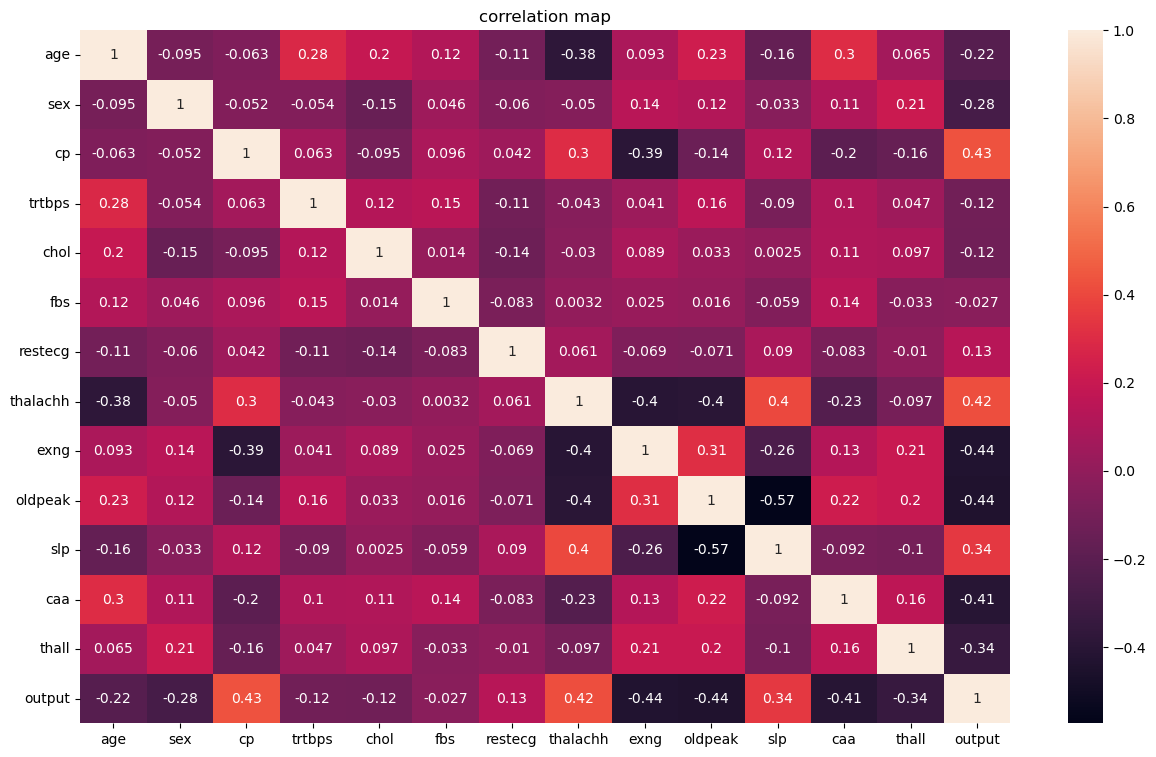

In [29]:
#Finding the correlation
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True);
#sns.heatmap
plt.title("correlation map")

From the above heatmap we observe that the features 'cp','thalachh','slp' are highly correlated to output (target variable).

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


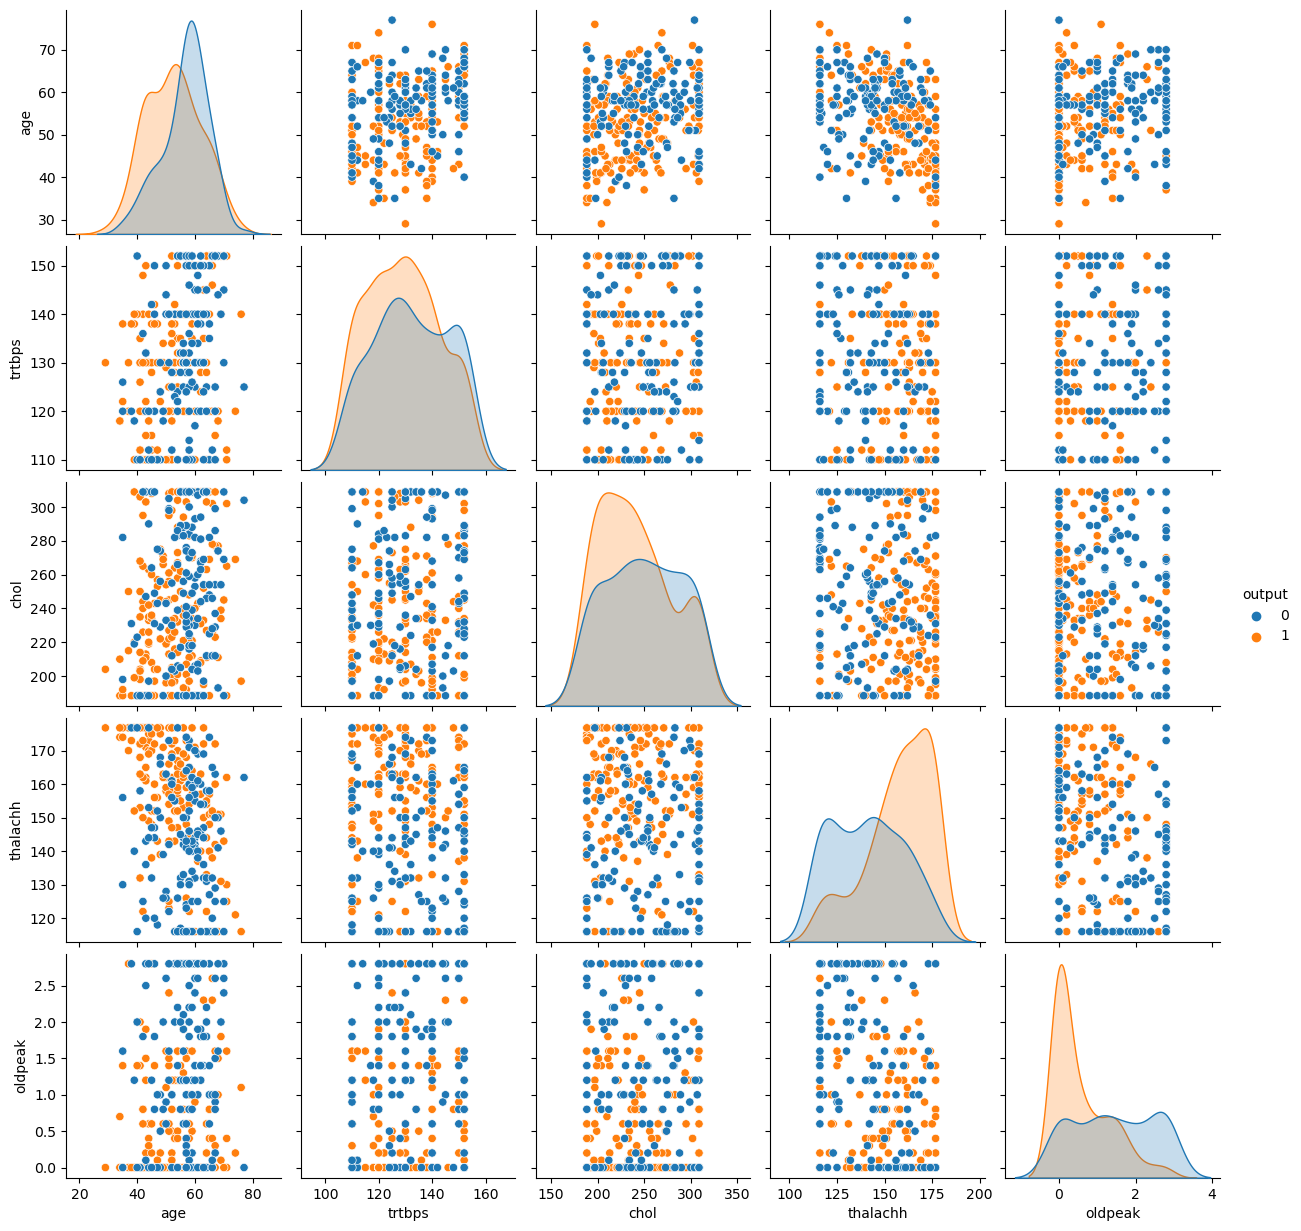

In [30]:
#pairplot of the numeric columns

sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')
#sns.pairplot(df[['age','trtbps','output']],hue='output')

From the above pair plot we can conclude that our dataset is not linearly seperable.

# conclusion(visulization)

# 1.The majority of the patients are older than  40.

2.In the dataset there are 2 times more males than females.

3.54.3% of the patients have a high a risk of heart attack, 45.7%-low  risk of heart attack

4.Age distribution of patients from the high -risk group has a peak at 57-58 ages.

5.Patients that have normal analysis results(such as electrocardiography or thallium stress test)are less likely to have a 
heart attack.

6.The major factors influencing heartattack are: chest pain,Maximum heart rate achieved , Excercise induced angina,ST depression
    induced by excercise relative to rest and Number of major vessel

# feature scaling

In [31]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


In [32]:
from sklearn.preprocessing import StandardScaler
#-infinity to infinity
#z= (x-mean)/standard deviation

scale=StandardScaler()
df[['age','trtbps','chol','thalachh']]=scale.fit_transform(df[['age','trtbps','chol','thalachh']])

In [33]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,1.064668,-0.298585,1,0,0.000372,0,2.3,0,0,1,1
1,-1.928548,1,2,-0.038476,0.135392,0,1,1.369395,0,2.8,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.038899,0,0,1.124197,0,1.4,2,0,2,1
3,0.174856,1,1,-0.773906,-0.222001,0,1,1.369395,0,0.8,2,0,2,1
4,0.285561,0,0,-0.773906,1.638995,0,1,0.664450,1,0.6,2,0,2,1


In [34]:
from sklearn.preprocessing import MinMaxScaler
# 0 to 1
# z = (x-min(x)/max(x)-min(x))

scale1 = MinMaxScaler()
df[['age','trtbps','chol','thalachh']]=scale1.fit_transform(df[['age','trtbps','chol','thalachh']])

In [35]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.833333,0.370124,1,0,0.559211,0,2.3,0,0,1,1
1,0.166667,1,2,0.476190,0.511203,0,1,1.000000,0,2.8,0,0,2,1
2,0.250000,0,1,0.476190,0.129461,0,0,0.921053,0,1.4,2,0,2,1
3,0.562500,1,1,0.238095,0.395021,0,1,1.000000,0,0.8,2,0,2,1
4,0.583333,0,0,0.238095,1.000000,0,1,0.773026,1,0.6,2,0,2,1


# Data Preparation

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
#split dataset into features and target tables

features_cols=['age','sex','cp','trtbps','chol',]